## Bollinger Bands with Python

This is not an investment advice.

Bollinger Bands belong among popular stock and cryptocurrency trading indicators. Bollinger Bands consist of 3 lines - price moving average for selected window (typically 20 datapoints), upper and lower Bollinger Band.

Upper and lower Bollinger bands are situated usually 2 standard deviations (sigma) above and below the moving average. Two sigma range means that the price will stay between Upper and Lower Bollinger band around 95% of the time. This can be used as a trading signal, since once price is outside the bands we have statistical outlier that is potentially actionable. Price above Upper Bollinger Band is considered overbought and conversely price below Lower band is considered oversold. 


Bollinger Band definition from investopedia:
https://www.investopedia.com/terms/b/bollingerbands.asp

$$ BU = MA(TP, n) + m * \sigma(TP, n) $$   
$$ BL = MA(TP, n) - m * \sigma(TP, n) $$

$BU$ = Upper Bollinger Band       <BR>
$BL$ = Lower Bollinger Band       <BR>

$MA(TP, n)$ ... Moving Average of Typical Price for given datapoint window n           <BR>
$TP = (High + Low + Close) / 3$ ... Typical Price                                      <BR>
$\sigma(TP, n)$ ... standard deviation computed from Typical Price for given datapoint window   <BR>

$n$ = datapoint window for MA                                   <BR>
$m$ = how many standard deviations width we are using           <BR>

Bollinger Bands can also nicely visualize price volatility. Bollinger Band range expansion is followed by range contraction and vice versa. This can be used to anticipate breakouts.

#### Library imports

In [353]:
#optional installations: 
#!pip install yfinance --upgrade --no-cache-dir
#!pip3 install pandas_datareader


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# ___library_import_statements___
import pandas as pd

# for pandas_datareader, otherwise it might have issues, sometimes there is some version mismatch
pd.core.common.is_list_like = pd.api.types.is_list_like

# make pandas to print dataframes nicely
pd.set_option('expand_frame_repr', False)  

import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

#newest yahoo API 
import yfinance as yahoo_finance

#optional 
#yahoo_finance.pdr_override()

%matplotlib inline

In [354]:
# ___variables___
#ticker = 'AAPL'
#ticker = 'TSLA'
#ticker = 'GOOGL'
#ticker = 'NFLX'
#ticker = 'GOOG'
ticker = 'BIDU'

start_time = datetime.datetime(2017, 1, 1)
#end_time = datetime.datetime(2019, 1, 20)
end_time = datetime.datetime.now().date().isoformat()         # today

#### Getting stock data from Yahoo API

In [355]:
# yahoo gives only daily historical data
connected = False
while not connected:
    try:
        df = web.get_data_yahoo(ticker, start=start_time, end=end_time)
        connected = True
        print('connected to yahoo')
    except Exception as e:
        print("type error: " + str(e))
        time.sleep( 5 )
        pass   

# use numerical integer index instead of date    
df = df.reset_index()
print(df.head(5))

connected to yahoo
        Date        High         Low        Open       Close   Volume   Adj Close
0 2017-01-03  169.660004  165.820007  166.300003  168.300003  2314700  168.300003
1 2017-01-04  173.259995  168.300003  169.740005  171.960007  2033200  171.960007
2 2017-01-05  177.839996  172.500000  172.649994  177.470001  2733000  177.470001
3 2017-01-06  177.279999  173.250000  176.279999  176.380005  2254700  176.380005
4 2017-01-09  179.720001  176.820007  178.000000  177.160004  1760400  177.160004


#### Function definition

In [356]:
def bollinger_bands(df, n, m):
    # takes dataframe on input
    # n = smoothing length
    # m = number of standard deviations away from MA
    
    #typical price
    TP = (df['High'] + df['Low'] + df['Close']) / 3
    # but we will use Adj close instead for now, depends
    
    data = TP
    #data = df['Adj Close']
    
    # takes one column from dataframe
    B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
    sigma = data.rolling(n, min_periods=n).std() 
    
    BU = pd.Series((B_MA + m * sigma), name='BU')
    BL = pd.Series((B_MA - m * sigma), name='BL')
    
    df = df.join(B_MA)
    df = df.join(BU)
    df = df.join(BL)
    
    return df

In [357]:
n = 20   # datapoint rolling window
m = 2    # sigma width
df = bollinger_bands(df, 20, 2)

In [358]:
print(df.head())
print(df.tail())

        Date        High         Low        Open       Close   Volume   Adj Close  B_MA  BU  BL
0 2017-01-03  169.660004  165.820007  166.300003  168.300003  2314700  168.300003   NaN NaN NaN
1 2017-01-04  173.259995  168.300003  169.740005  171.960007  2033200  171.960007   NaN NaN NaN
2 2017-01-05  177.839996  172.500000  172.649994  177.470001  2733000  177.470001   NaN NaN NaN
3 2017-01-06  177.279999  173.250000  176.279999  176.380005  2254700  176.380005   NaN NaN NaN
4 2017-01-09  179.720001  176.820007  178.000000  177.160004  1760400  177.160004   NaN NaN NaN
          Date        High         Low        Open       Close   Volume   Adj Close        B_MA          BU          BL
946 2020-10-06  127.080002  124.180000  124.980003  124.830002  1610900  124.830002  123.613000  127.812606  119.413394
947 2020-10-07  126.989998  125.320000  125.800003  126.349998  1715500  126.349998  123.952333  127.813017  120.091650
948 2020-10-08  128.699997  126.389999  128.699997  126.750000  

#### Plot daily data and Bollinger Bands

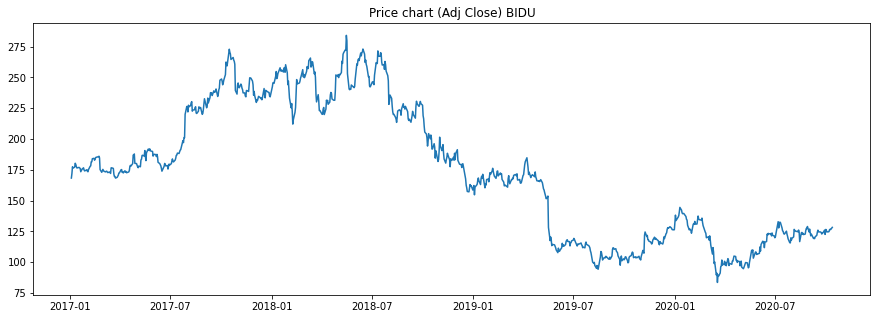

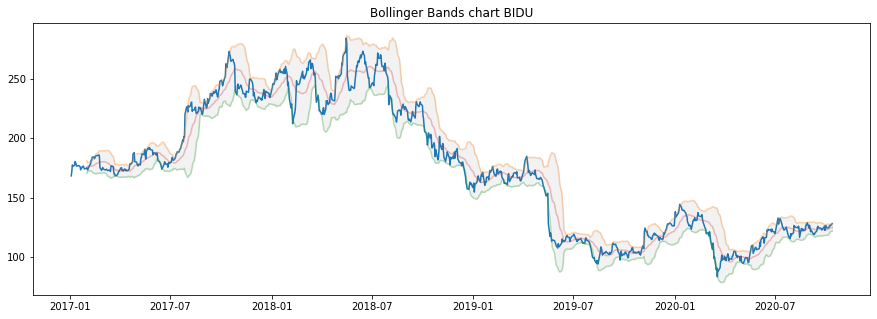

In [359]:
# plot price
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Price chart (Adj Close) ' + str(ticker))
plt.show()

# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart ' + str(ticker))
plt.plot(df['Date'], df['Adj Close'])
plt.plot(df['Date'], df['BU'], alpha=0.3)
plt.plot(df['Date'], df['BL'], alpha=0.3)
plt.plot(df['Date'], df['B_MA'], alpha=0.3)
plt.fill_between(df['Date'], df['BU'], df['BL'], color='grey', alpha=0.1)

plt.show()

#### Signalling noise supression

Following is consideration for swing trading or just investing during dips. When we want to get less trading signals, we can try to increase the time window, here from daily to weekly data. So we will resample our initial dataframe to weekly and then plot long and short signals.


In [360]:
#### RESAMPLING TO WEEKLY TO CLEAN NOISE

agg_dict = {'Open': 'first',
          'High': 'max',
          'Low': 'min',
          'Close': 'last',
          'Adj Close': 'last',
          'Volume': 'mean'}

# resampled dataframe
# 'W' means weekly aggregation
df.set_index('Date', inplace=True)
df_agg = df.resample('W').agg(agg_dict)
df_agg = df_agg.reset_index()

In [361]:
# add BB columns
n = 20   # datapoint rolling window
m = 2    # sigma width
df_agg = bollinger_bands(df_agg, 20, 2)

We can generate signals by checking for situations when Closing price is out of bounds or when High or Low price is outside the Bollinge Bands.

In [362]:
def add_signal(df):
    # adds two columns to dataframe with buy and sell signals
    buy_list = []
    sell_list = []
    
    for i in range(len(df['Close'])):
        #if df['Close'][i] > df['BU'][i]:           # sell signal     daily
        if df['High'][i] > df['BU'][i]:             # sell signal     weekly
            buy_list.append(np.nan)
            sell_list.append(df['Close'][i])
        #elif df['Close'][i] < df['BL'][i]:         # buy signal      daily
        elif df['Low'][i] < df['BL'][i]:            # buy signal      weekly
            buy_list.append(df['Close'][i])
            sell_list.append(np.nan)  
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
         
    buy_list = pd.Series(buy_list, name='Buy')
    sell_list = pd.Series(sell_list, name='Sell')
        
    df = df.join(buy_list)
    df = df.join(sell_list)        
     
    return df

In [363]:
def plot_signals(df, ticker):
    # plot price
    plt.figure(figsize=(15,5))
    plt.plot(df['Date'], df['Adj Close'])
    plt.title('Price chart (Adj Close) ' + str(ticker))
    plt.show()

    # plot  values and significant levels
    plt.figure(figsize=(15,5))
    plt.title('Bollinger Bands chart ' + str(ticker))
    plt.plot(df['Date'], df['Adj Close'], label='Adj Close')

    plt.plot(df['Date'], df['High'], label='High', alpha=0.3)
    plt.plot(df['Date'], df['Low'], label='Low', alpha=0.3)

    plt.plot(df['Date'], df['BU'], label='B_Upper', alpha=0.3)
    plt.plot(df['Date'], df['BL'], label='B_Lower', alpha=0.3)
    plt.plot(df['Date'], df['B_MA'], label='B_SMA', alpha=0.3)
    plt.fill_between(df['Date'], df['BU'], df['BL'], color='grey', alpha=0.1)

    plt.scatter(df['Date'], df['Buy'], label='Buy', marker='^')
    plt.scatter(df['Date'], df['Sell'], label='Sell', marker='v')

    plt.legend()

    plt.show()

#### Weekly graph with trading signals

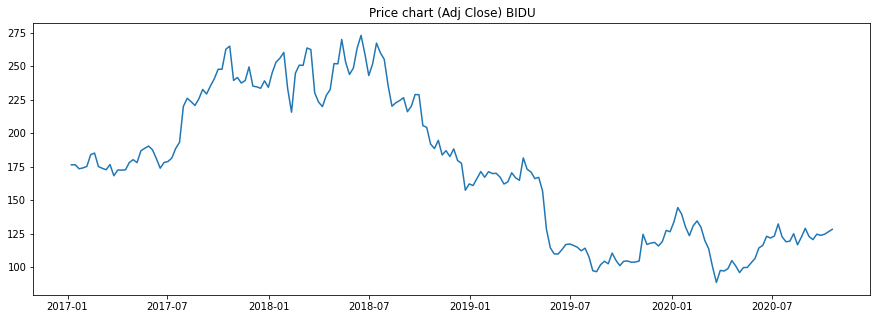

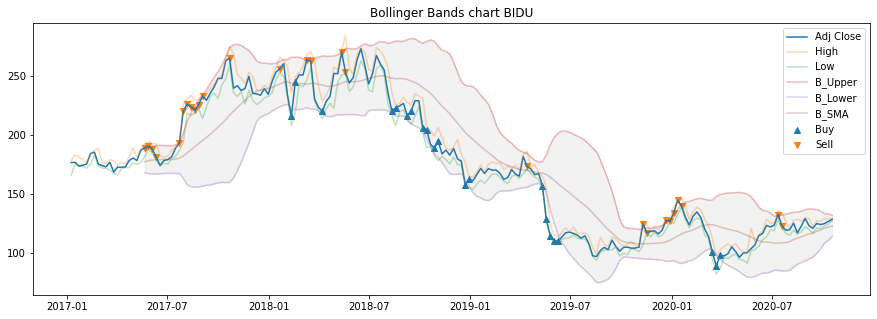

In [364]:
df_agg = add_signal(df_agg)
plot_signals(df_agg, ticker)

In the example of BIDU stock we see breakouts from range contraction where price was at consolidation. It is worth considering to follow second or third buy signal after breaking down from tight range. Bollinger Bands are complementary indicator and are best to be used along RSI, MACD or other indicators.

#### Sources:
https://github.com/Crypto-toolbox/pandas-technical-indicators   <BR>
https://www.quantopian.com/posts/technical-analysis-indicators-without-talib-code  <BR>
https://www.investopedia.com/terms/b/bollingerbands.asp     <BR>
https://www.youtube.com/watch?v=gEIw2iUlFYc&ab_channel=ComputerScience